# Importing Libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os

# Loading Data

In [6]:
def load_data(working_dir):
    X = []
    Y = []

    for root, dirs, all_images in os.walk(working_dir):
        for image in all_images:
            try:
                img = cv2.imread(os.path.join(root, image))
                img = cv2.resize(img, (300, 300))
                img = img / 255
                X.append(img)
                Y.append(root.split('\\')[-1])
            except Exception as e:
                pass


    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [7]:
working_dir = r"D:\\CV\\Vegetable_vs_fruit\\dataset\\train\\"
X, Y = load_data(working_dir)

In [8]:
print(f"X = {X.shape}")
print(f"Y = {Y.shape}")

X = (3114, 300, 300, 3)
Y = (3114,)


In [9]:
import joblib
joblib.dump(X,"Input_X.pkl")
joblib.dump(Y,"Target_Y.pkl")

['Target_Y.pkl']

# Encoding Target

In [10]:
Y

array(['apple', 'apple', 'apple', ..., 'watermelon', 'watermelon',
       'watermelon'], dtype='<U13')

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y

array([ 0,  0,  0, ..., 35, 35, 35], dtype=int64)

In [12]:
encoder.classes_

array(['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage',
       'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn',
       'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno',
       'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika',
       'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish',
       'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato',
       'turnip', 'watermelon'], dtype='<U13')

# Displaying sample img

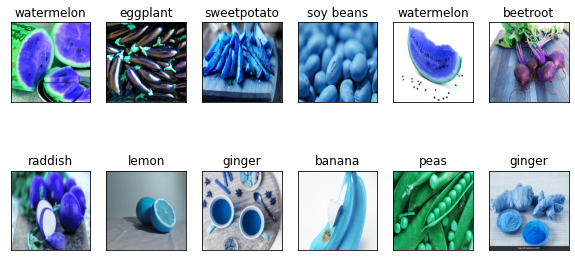

In [14]:
import random
sample_img = [random.randint(1,len(X)) for i in range(12)]
sample_img

fig, axes = plt.subplots(2, 6,figsize=(10, 5))

for i in range(12):
    axes[i // 6, i % 6].imshow(X[sample_img[i]])
    axes[i // 6, i % 6].set_title(f"{encoder.classes_[Y[sample_img[i]]]}")
    axes[i // 6, i % 6].get_xaxis().set_visible(False)
    axes[i // 6, i % 6].get_yaxis().set_visible(False)


# Modelling

In [15]:
# Define the CNN model architecture.
model = Sequential()

# 1 CNN
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D((2, 2)))

# 2CNN
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3 Fully Connected Layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

# 4 Output Layer
model.add(Dense(36, activation='softmax'))

# Compile the model.
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               4

In [17]:
# Train the model.
model.fit(X, Y, batch_size=32, epochs=5)

Epoch 1/5
98/98 [==============================] - 153s 2s/step - loss: 4.7301 - accuracy: 0.0446
Epoch 2/5
98/98 [==============================] - 145s 1s/step - loss: 3.1011 - accuracy: 0.1358
Epoch 3/5
98/98 [==============================] - 151s 2s/step - loss: 2.3295 - accuracy: 0.3706
Epoch 4/5
98/98 [==============================] - 146s 1s/step - loss: 1.1224 - accuracy: 0.7001
Epoch 5/5
98/98 [==============================] - 147s 1s/step - loss: 0.4529 - accuracy: 0.8956


In [18]:
joblib.dump(model,"model_5_epoch.pkl")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-27 12:20:05         3515
metad

['model_5_epoch.pkl']

# Testing my model

In [19]:
def classify_image(path):
    og = cv2.imread(path)
    p1 = cv2.resize(og,(300,300))
    p1 = p1/255
    p1 = np.array([p1])
    prediction = model.predict(p1)
    probability = np.argmax(prediction)
    output = encoder.classes_[probability]
    plt.imshow(og)
    plt.title(output)

1/1 [==============================] - 0s 41ms/step


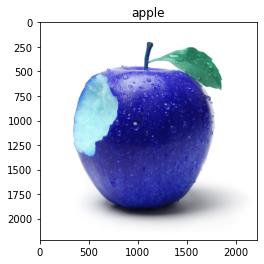

In [23]:
classify_image(r"D:\CV\Vegetable_vs_fruit\dataset\test\apple\Image_1.jpg")